# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

# **Heart Failure Clinical Records Dataset**

### **Sumber: Kaggle - Heart Failure Clinical Data (https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)**

**Latar Belakang Masalah:**

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor satu secara global, merenggut sekitar 17,9 juta nyawa setiap tahunnya, yang mewakili 31% dari semua kematian global. Gagal jantung adalah kejadian umum yang disebabkan oleh CVDs. Deteksi dini dan manajemen klinis sangat penting untuk mengurangi angka kematian.

Dalam proyek ini, kita berperan sebagai Data Scientist yang bertugas membangun model Machine Learning untuk memprediksi kematian (mortality) akibat gagal jantung. Model ini diharapkan dapat membantu tenaga medis dalam mengidentifikasi pasien berisiko tinggi lebih awal.

**Deskripsi Variabel Target:**

Kolom DEATH_EVENT adalah variabel target yang akan diprediksi:

- Nilai 0: Pasien bertahan hidup (Survived) selama periode follow-up.

- Nilai 1: Pasien meninggal dunia (Deceased) selama periode follow-up.

**Fitur (Kolom) dalam Dataset:**


- age: Usia pasien (Tahun).

- anaemia: Penurunan sel darah merah atau hemoglobin (0: Tidak, 1: Ya).

- creatinine_phosphokinase: Level enzim CPK dalam darah (mcg/L).

- diabetes: Apakah pasien menderita diabetes (0: Tidak, 1: Ya).

- ejection_fraction: Persentase darah yang meninggalkan jantung pada setiap kontraksi (%).

- high_blood_pressure: Apakah pasien memiliki hipertensi (0: Tidak, 1: Ya).

- platelets: Trombosit dalam darah (kiloplatelets/mL).

- serum_creatinine: Level kreatinin dalam darah (mg/dL) - Indikator fungsi ginjal.

- serum_sodium: Level sodium dalam darah (mEq/L).

- sex: Jenis kelamin pasien (0: Perempuan, 1: Laki-laki).

- smoking: Apakah pasien merokok (0: Tidak, 1: Ya).

- time: Periode follow-up (hari).


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [25]:
import kagglehub
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [8]:
# Download latest version
path = kagglehub.dataset_download("andrewmvd/heart-failure-clinical-data")

print("Path to dataset files:", path)
csv_file = os.path.join(path, "heart_failure_clinical_records_dataset.csv")
df = pd.read_csv(csv_file)
df.head()

Using Colab cache for faster access to the 'heart-failure-clinical-data' dataset.
Path to dataset files: /kaggle/input/heart-failure-clinical-data


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [12]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


/tmp/ipython-input-460131069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='DEATH_EVENT', data=df, palette='coolwarm')


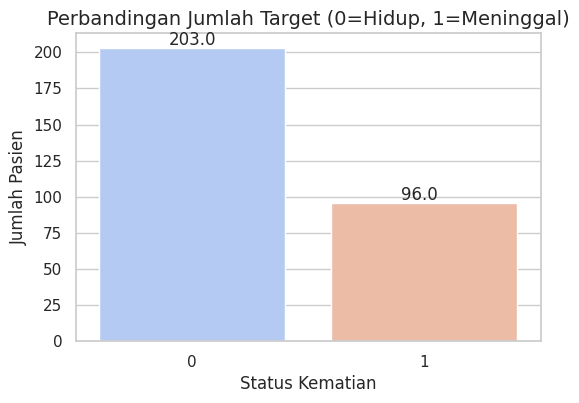

In [15]:
# Set gaya visualisasi
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='DEATH_EVENT', data=df, palette='coolwarm')

# Kasih judul
plt.title('Perbandingan Jumlah Target (0=Hidup, 1=Meninggal)', fontsize=14)
plt.xlabel('Status Kematian')
plt.ylabel('Jumlah Pasien')

# Tampilkan angka di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 2))

plt.show()

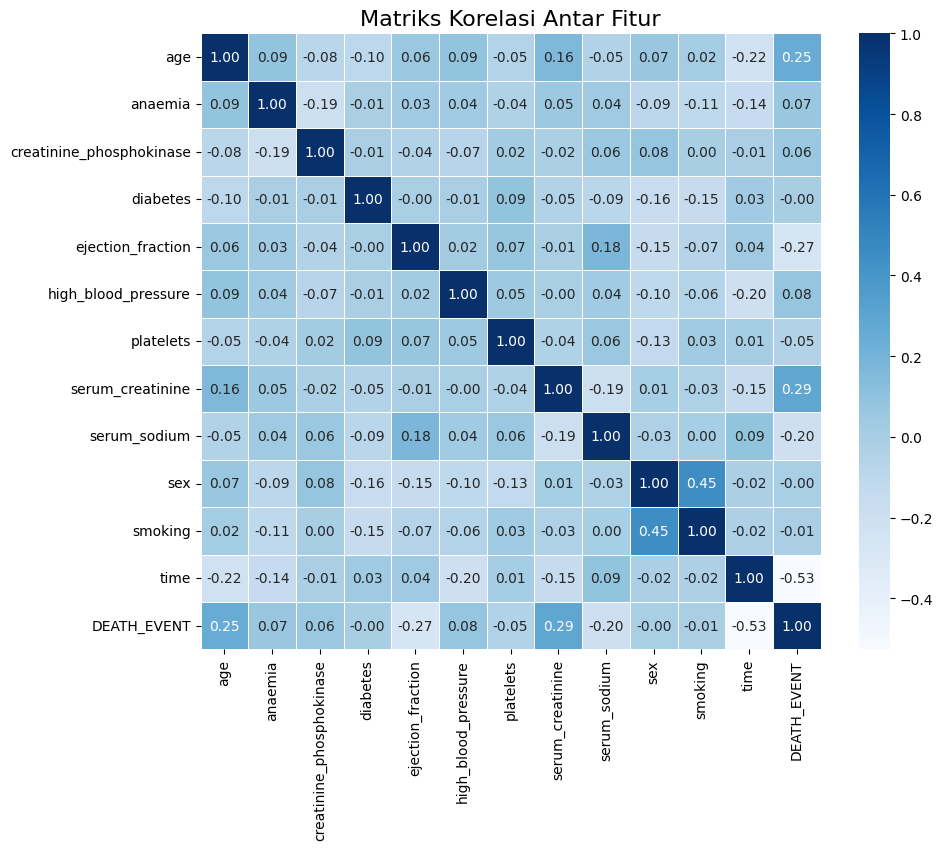

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()

# Gambar heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', linewidths=0.5)
plt.title('Matriks Korelasi Antar Fitur', fontsize=16)
plt.show()

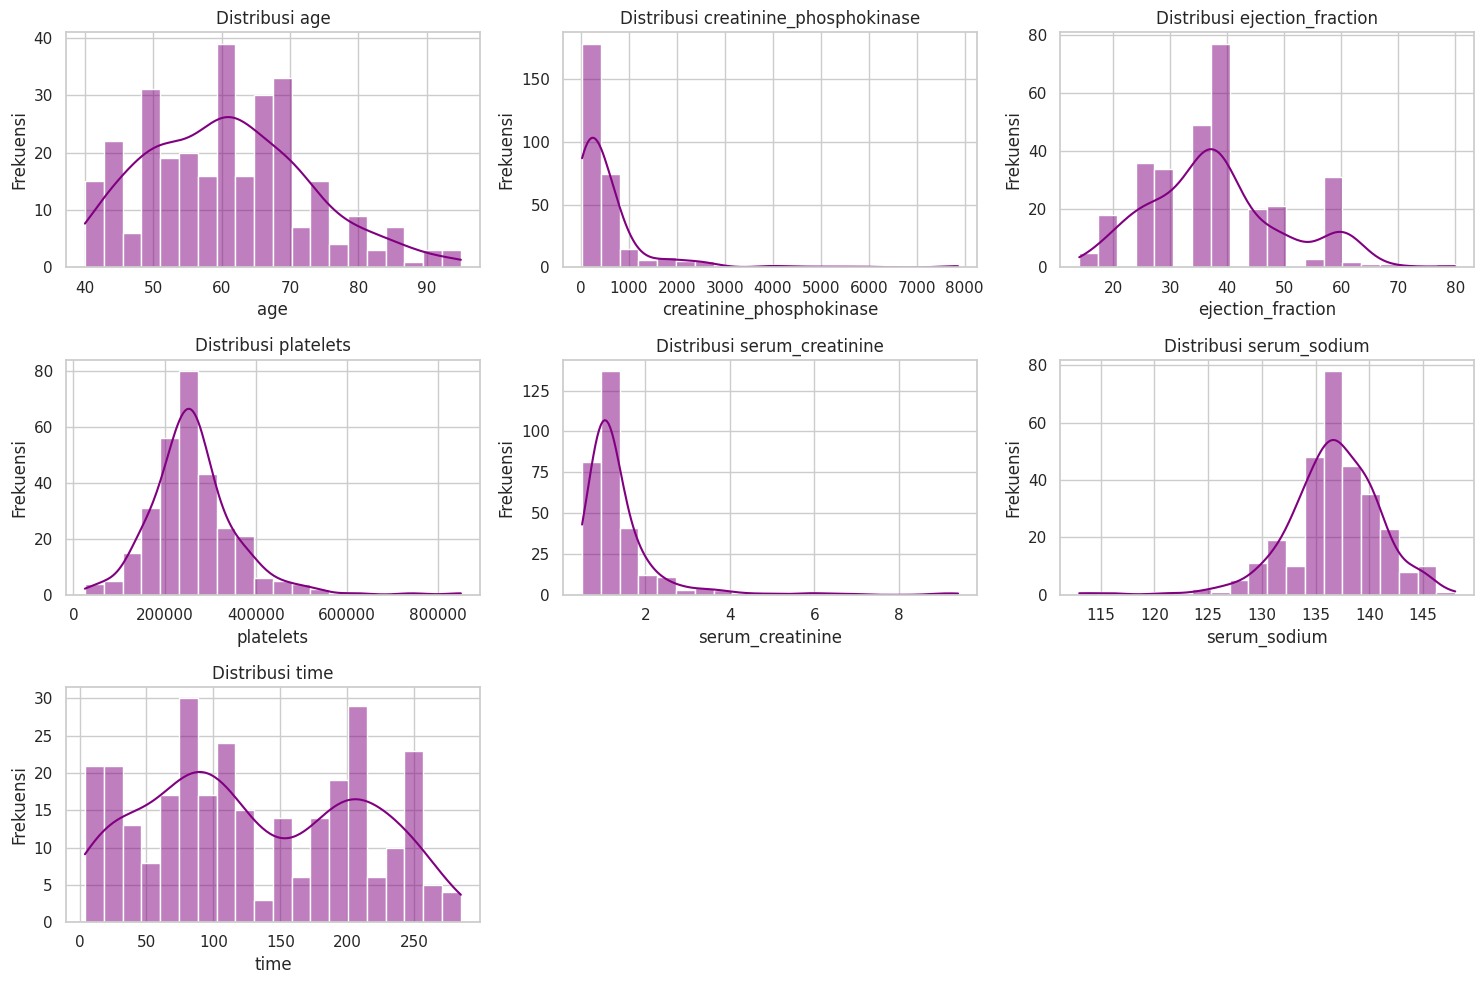

In [19]:
# Daftar kolom numerik (angka yang rentangnya lebar)
numerical_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                  'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Setting ukuran gambar biar muat semua
plt.figure(figsize=(15, 10))

# Looping untuk bikin grafik satu per satu
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Bikin tata letak kisi-kisi (grid) 3 baris x 3 kolom
    sns.histplot(df[col], kde=True, bins=20, color='purple')
    plt.title(f'Distribusi {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2912378693.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y='age', data=df, ax=axes[0, 0], palette='Set2')
/tmp/ipython-input-2912378693.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df, ax=axes[0, 1], palette='Set2')
/tmp/ipython-input-2912378693.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df, ax=axes[1, 0], palette='Set2')
/tmp/ipython-input-2912378693.py:17: FutureWarning: 

Passing `palette` wit

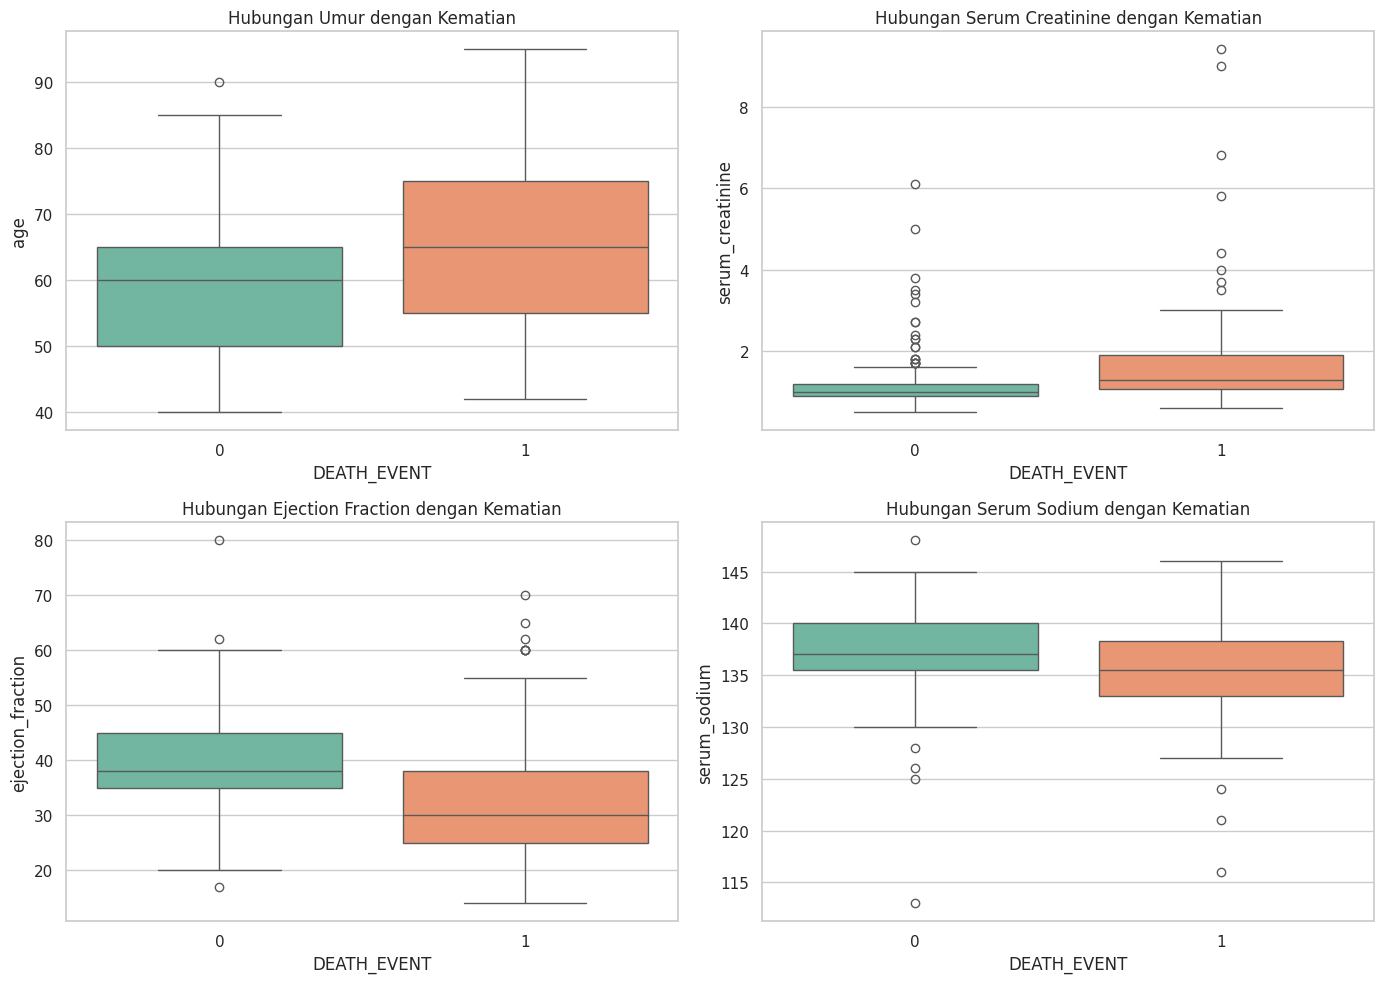

In [16]:
# Buat kanvas gambar 2x2 (bikin 4 grafik sekaligus biar keren)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Grafik 1: Umur vs Kematian
sns.boxplot(x='DEATH_EVENT', y='age', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Hubungan Umur dengan Kematian')

# Grafik 2: Serum Creatinine vs Kematian (Biasanya ini fitur paling ngaruh!)
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Hubungan Serum Creatinine dengan Kematian')

# Grafik 3: Ejection Fraction vs Kematian
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Hubungan Ejection Fraction dengan Kematian')

# Grafik 4: Serum Sodium vs Kematian
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Hubungan Serum Sodium dengan Kematian')

plt.tight_layout()
plt.show()

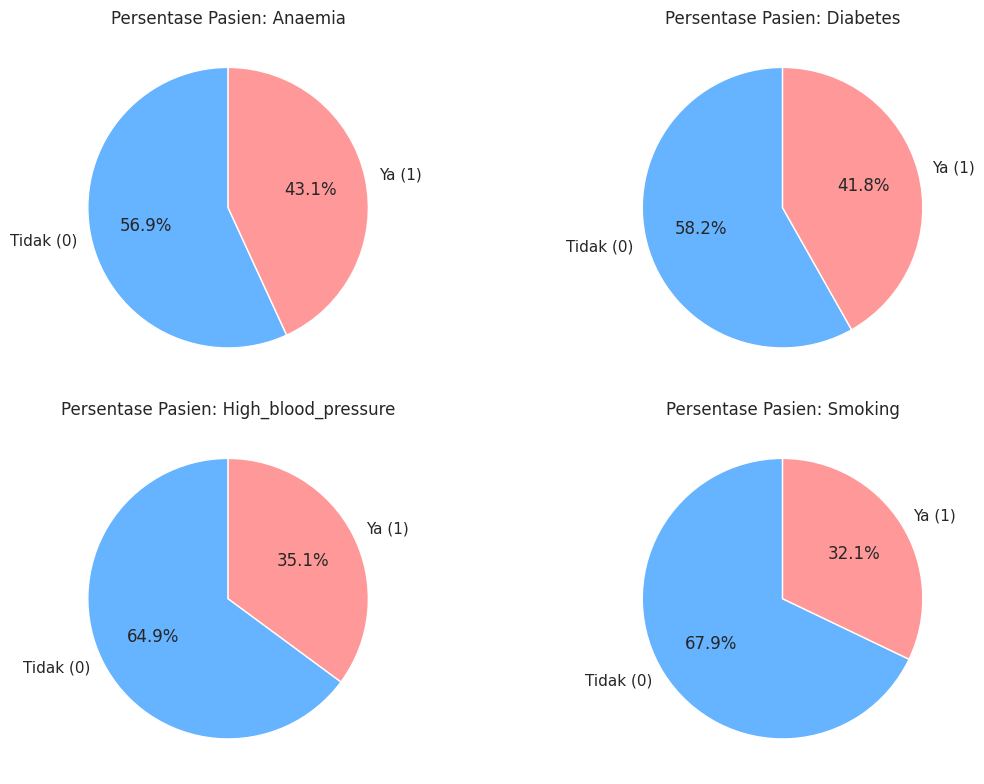

In [18]:
# Fitur kategorikal yang mau dicek
features = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

plt.figure(figsize=(12, 8))

for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    # Hitung persentase
    counts = df[col].value_counts()
    plt.pie(counts, labels=['Tidak (0)', 'Ya (1)'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
    plt.title(f'Persentase Pasien: {col.capitalize()}')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [20]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

print("Shape awal:", X.shape)

Shape awal: (299, 12)


In [26]:
cols_to_scale = [
    'age',
    'creatinine_phosphokinase',
    'ejection_fraction',
    'platelets',
    'serum_creatinine',
    'serum_sodium',
    'time'
]
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [27]:
print("\nContoh Data Sebelum Scaling (Platelets):")
print(X['platelets'].head(3).values)

print("\nContoh Data SETELAH Scaling (Platelets):")
print(X_scaled['platelets'].head(3).values)


Contoh Data Sebelum Scaling (Platelets):
[265000.   263358.03 162000.  ]

Contoh Data SETELAH Scaling (Platelets):
[ 1.68164843e-02  7.53566018e-09 -1.03807313e+00]


In [29]:
df_clean = pd.concat([X_scaled, y], axis=1)
df_clean.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0,-1.629502,1
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0,-1.603691,1
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1,-1.590785,1
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0,-1.590785,1
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0,-1.577879,1


In [30]:
output_folder = "Heart Failure_preprocessing" # Sesuaikan nama folder yg diminta rubrik
os.makedirs(output_folder, exist_ok=True)

output_path = os.path.join(output_folder, "heart_failure_clean.csv")
df_clean.to_csv(output_path, index=False)

print(f"File bersih berhasil disimpan di: {output_path}")

File bersih berhasil disimpan di: Heart Failure_preprocessing/heart_failure_clean.csv
